In [1]:
from keras.datasets import fashion_mnist

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Preprocessing and analyzing the data

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [4]:
print("Training data shape:",trainX.shape)
print("Training data label shape:",trainy.shape)
print("Testing data shape:",testX.shape)
print("Testing data label shape:",testy.shape)

Training data shape: (60000, 28, 28)
Training data label shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing data label shape: (10000,)


In [5]:
print("Training data type:",trainX.dtype)
print("Training data label type:",trainy.dtype)
print("Testing data type:",testX.dtype)
print("Testing data label type:",testy.dtype)

Training data type: uint8
Training data label type: uint8
Testing data type: uint8
Testing data label type: uint8


In [6]:
trainy

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
print("Amount of samples:",len(trainX[:]))

Amount of samples: 60000


In [8]:
#plots an image given index
def plot_image(index, train_data, shape = 28):
    plt.imshow(trainX[index].reshape(shape, shape),cmap = plt.get_cmap('gray'), interpolation = 'nearest')
    print("Label:",trainy[index])

Label: 2


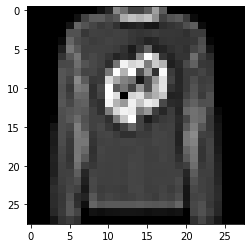

In [9]:
plot_image(123, trainX)

In [10]:
sampleDF = pd.DataFrame(data = trainX.reshape(60000,28*28))
sampleDF

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [11]:
labelDF = pd.DataFrame(data = trainy, columns = ["Label"])
labelDF

,Label
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


In [12]:
print("Sample DataFrame data types\n",sampleDF.dtypes)

Sample DataFrame data types
 0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object


In [13]:
print("Label DataFrame data types\n",sampleDF.dtypes)
print(labelDF.dtypes)

Label DataFrame data types
 0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object
Label    uint8
dtype: object


In [14]:
#Concatenate the 2 dataframes into one dataframe we will work with
data = pd.concat([sampleDF, labelDF], axis = 1)

In [15]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


## Label information
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

In [16]:
data["Label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: Label, dtype: int64

## Models

## KNN

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
X = data.drop("Label", axis = 1).values

In [20]:
y = data['Label'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [22]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)

In [23]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
KNN_model.score(X_test, y_test)

0.8485555555555555

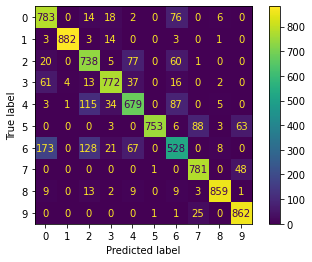

In [25]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [27]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy')

In [28]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
print("The number of leaf nodes in the model:",decision_tree_model.get_n_leaves())

The number of leaf nodes in the model: 3499


In [30]:
print("The depth of the tree in the model:",decision_tree_model.get_depth())

The depth of the tree in the model: 31


In [31]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
print("Decision tree model score:",decision_tree_model.score(X_test, y_test))

Decision tree model score: 0.8017777777777778


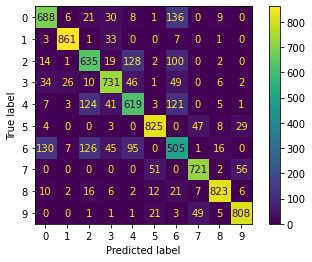

In [33]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test)

In [34]:
#Cross-validating five times(Any more then that is too slow)
#print("cv_scores mean:",cross_val_score(decision_tree_model, X_train, y_train, cv=5)

## Applying grid search on the 2 models to tune hyper-parameters

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [55]:
##KNN model
KNN = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,5)}
KNN_grid = GridSearchCV(KNN, parameters)
KNN_grid.fit(X_train, y_train)

ValueError: DataFrame constructor not properly called!

In [56]:
pd.DataFrame(KNN_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012102,0.002478,8.724827,0.034888,1,{'n_neighbors': 1},0.853137,0.852549,0.848333,0.841961,0.843725,0.847941,0.004515,3
1,0.010602,0.000200,9.146902,0.026287,2,{'n_neighbors': 2},0.852059,0.842745,0.847941,0.844510,0.837451,0.844941,0.004915,4
2,0.010802,0.000245,9.594480,0.044900,3,{'n_neighbors': 3},0.856373,0.848627,0.855686,0.844804,0.845686,0.850235,0.004902,2
3,0.010702,0.000245,12.012403,0.282498,4,{'n_neighbors': 4},0.859412,0.851078,0.859608,0.848824,0.851275,0.854039,0.004549,1


## Pixel Importance using RandomForestClassifier

Random forest score: 0.8801111111111111


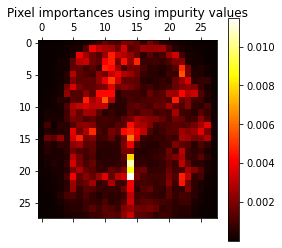

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Random forest score:",forest.score(X_test, y_test))
#cv_scores = cross_val_score(forest, X_train, y_train, cv=5)
#print(cv_scores)
#print("cv_scores mean: " + str(np.mean(cv_scores)))
    
importances = forest.feature_importances_
imp_reshaped = importances.reshape((28, 28))
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

In [36]:
features = pd.Series(forest.feature_importances_, index=range(784))
top_features = features.sort_values(ascending=False).head(600)
print(top_features)
top_features = top_features.index.values.tolist()

602    0.011490
546    0.010521
574    0.008770
518    0.007954
434    0.006213
         ...   
778    0.000440
137    0.000439
492    0.000439
61     0.000432
762    0.000409
Length: 600, dtype: float64


In [37]:
#Create a new dataframe where samples have the 600 most important pixels
top_data = data.iloc[:, top_features]
top_data = pd.concat([top_data, labelDF], axis = 1)
X_top_data = top_data.values
y_top_data = top_data['Label'].values
X_top_data_train, X_top_data_test, y_top_data_train, y_top_data_test = train_test_split(X_top_data, y_top_data, test_size = 0.15, random_state = 42)

In [38]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_top_data_train, y_top_data_train)
print("Random forest score after cropping out not important pixels:",forest.score(X_top_data_test, y_top_data_test))
#cv_scores = cross_val_score(forest, X_top_data_train, y_top_data_train, cv=5)
#print(cv_scores)
#print("cv_scores mean: " + str(np.mean(cv_scores)))

Random forest score after cropping out not important pixels: 0.9614444444444444


In [39]:
#plot_image(123,X_top_data,shape = int(601**0.5))

In [40]:
top_data.shape

(60000, 601)

In [52]:
unique, counts = np.unique(y_top_data_test, return_counts=True)
dict(zip(unique, counts))

{0: 899,
 1: 906,
 2: 901,
 3: 905,
 4: 924,
 5: 916,
 6: 925,
 7: 830,
 8: 905,
 9: 889}

## Using new datafame on previous models

## *KNN-improved data*

In [41]:
KNN_model.fit(X_top_data_train, y_top_data_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
print("Improved data KNN score:",KNN_model.score(X_top_data_test, y_top_data_test))

Improved data KNN score: 0.8484444444444444


## *Decision tree-improved data*

In [44]:
decision_tree_model.fit(X_top_data_train, y_top_data_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
print("Improved data decision tree model score:",decision_tree_model.score(X_top_data_test, y_top_data_test))

Improved data decision tree model score: 1.0


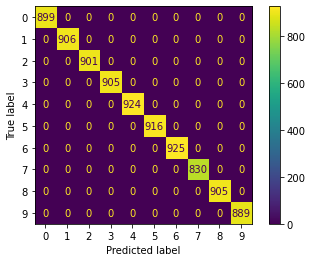

In [46]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_top_data_test, y_top_data_test)